# Brain MRI Validator (MobileNetV2 using RGB Grayscale Images)

In [1]:
# 1. Import Libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# 2. Data Generator (Force RGB mode)
IMG_SIZE = (224, 224)

train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2]
)

val_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(
    'binary_mri_checker/train',
    target_size=IMG_SIZE,
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    classes=['NonMRI', 'MRI'] 
)

val_data = val_gen.flow_from_directory(
    'binary_mri_checker/val',
    target_size=IMG_SIZE,
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    classes=['NonMRI', 'MRI'] 
)
print(train_data.class_indices) 

Found 1911 images belonging to 2 classes.
Found 885 images belonging to 2 classes.
{'NonMRI': 0, 'MRI': 1}


In [3]:
# 3. Build MobileNetV2 Model
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │           1,281 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,259,265 (8.62 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [4]:
# 4. Train the Model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)

C:\Users\Administrator\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.6253 - loss: 0.6450 - val_accuracy: 0.8350 - val_loss: 0.4224
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.8154 - loss: 0.4092 - val_accuracy: 0.9141 - val_loss: 0.2962
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.8958 - loss: 0.2986 - val_accuracy: 0.9446 - val_loss: 0.2266
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.9390 - loss: 0.2155 - val_accuracy: 0.9616 - val_loss: 0.1813
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.9536 - loss: 0.1695 - val_accuracy: 0.9627 - val_loss: 0.1532
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.9626 - loss: 0.1480 - val_accuracy: 0.9695 - val_loss: 0.1294
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.9767 - loss: 0.1180 - val_accuracy: 0.9751 - val_loss: 0.1126
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.9818 - loss: 0.0992 - val_accuracy: 0.9763 - val_loss:

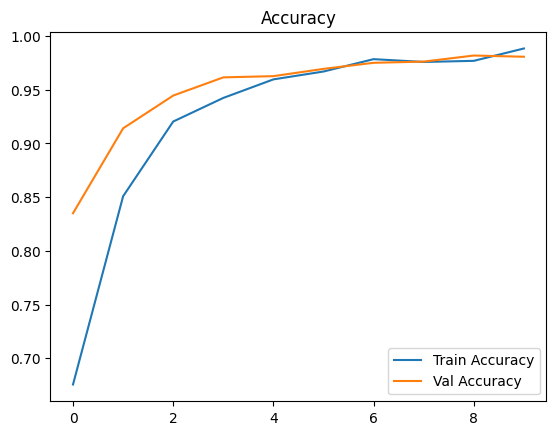

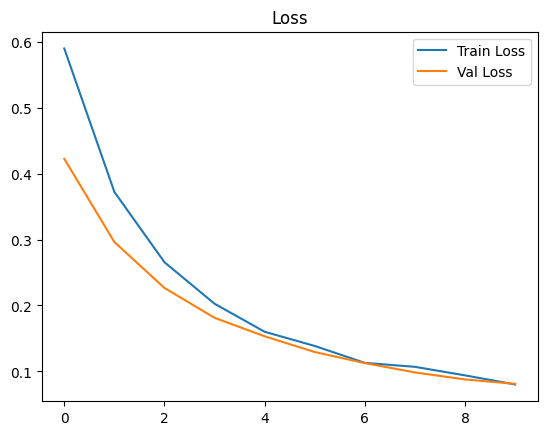

In [5]:
# 5. Plot Training Metrics
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')
plt.show()


In [6]:
# 6. Save the Model
model.save('brainMri_validator.keras')


In [7]:
# Load your saved model
model = tf.keras.models.load_model('brainMri_validator.keras')

# Evaluate model and test data accuracy
test_loss, test_acc = model.evaluate(val_data)
print(f"Test accuracy: {test_acc*100:0.4f}%")

28/28 ━━━━━━━━━━━━━━━━━━━━ 18s 562ms/step - accuracy: 0.9853 - loss: 0.0764
Test accuracy: 98.0791%


In [8]:
# Set image size used during training
IMG_SIZE = (224, 224, 3)

# Function to load and preprocess image
def load_image(image_path):
    """
    Loads and preprocesses an image for prediction.
    Handles both grayscale and RGB input automatically.
    """
    # Load as grayscale first
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=IMG_SIZE, color_mode='grayscale')
    img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0  # shape: (224, 224, 3)

    # Convert to tensor
    img_tensor = tf.convert_to_tensor(img_array)

    # Convert to RGB if model expects 3 channels
    if model.input_shape[-1] == 3:
        img_tensor = tf.image.grayscale_to_rgb(img_tensor)

    img_tensor = tf.expand_dims(img_tensor, 0)  # Add batch dimension
    return img_tensor

# Function to make prediction
def predict_image(image_path, threshold=0.7):
    """
    Predicts if an image is a brain MRI or not.

    Parameters:
    - image_path: str, path to the image
    - threshold: float, decision threshold (default: 0.7)

    Returns:
    - result: str ("Brain MRI" or "Not a Brain MRI")
    - confidence: float (model output between 0 and 1)
    """
    img = load_image(image_path)
    prediction = model.predict(img)[0][0]
    label = "Brain MRI" if prediction >= threshold else "Not a Brain MRI"
    return label, prediction

In [9]:
# Example usage
image_path = "mri5.jpg"  # Replace with your test image
label, confidence = predict_image(image_path)
print(f"Prediction: {label}")
print(f"Confidence: {confidence:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Prediction: Brain MRI
Confidence: 0.9885


In [10]:
image_path = "pp_photo.jpeg"  # Replace with your test image
label, confidence = predict_image(image_path)
print(f"Prediction: {label}")
print(f"Confidence: {confidence:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Prediction: Not a Brain MRI
Confidence: 0.0225
